# Pytorch线性回归
Linear Regression

线性回归是最基本的机器学习算法之一，用于预测一个连续值。

线性回归是一种简单且常见的回归分析算法，目的是通过拟合一个线性函数来预测输出。

对于一个简单的线性回归问题，模型可以表示为：
$$
y = w_1x_1 + w_2x_2 + ... + w_nx_n + b
$$

- $y$ 是预测值（目标值）；
- $x_1, x_2, ..., x_n$ 是输入特征；
- $w_1, w_2, ..., w_n$ 是待学习的权重（模型参数）；
- $b$ 是偏置项（截距）。

![alet linear regression](<assets/Linear_regression.png>)

在pytorch中，先行回归模型可以通过继承 `nn.Module` 类来实现。我们需要定义模型的结构和前向传播方法。

## 1. 数据准备
需要先准备一些假数据，用于训练线性回归模型，这里可以生成一个简单的线性关系的数据集，其中每个样本有两个特征 $x_1$ 和 $x_2$，目标值 $y$ 是这两个特征的线性组合加上一个随机噪声。

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# random seed for reproducibility, to ensure the results are the same every time
torch.manual_seed(42)

# Generate training data
X = torch.randn(100, 2)
true_w = torch.tensor([2.0, 3.0])     # assume the true weights are 2 and 3
true_b = 4.0                          # assume the true bias is 4

Y = X @ true_w + true_b + torch.randn(100) * 0.1  # add some noise

# print some training data
print(X[:5])
print(Y[:5])

tensor([[ 1.9269,  1.4873],
        [ 0.9007, -2.1055],
        [ 0.6784, -1.2345],
        [-0.0431, -1.6047],
        [-0.7521,  1.6487]])
tensor([12.4460, -0.4663,  1.7666, -0.9357,  7.4781])


上面的代码创建了一个带有噪声的先行数据集，输入 $X$ 为 $100\times2$ 的矩阵，每个样本有两个特征，输出 $Y$ 有真实的权重和偏置生成，并加上了一些随机噪声

## 2. 定义线性回归模型
可以通过继承 `nn.Module` 类来实现一个简单的线性回归模型，在pytorch中，线性回归的核心是 `nn.Linear()` 层，它会自动处理权重和偏置的初始化。

In [2]:
import torch.nn as nn

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        # define a linear layer with 2 input features and 1 output feature
        self.linear = nn.Linear(2, 1)     # the dimension of the input is 2, and the output is 1

    def forward(self, x):
        # forward pass through the linear layer, and return the predictions values
        return self.linear(x)
    
# Create an instance of the model
model = LinearRegressionModel()

上面的 `nn.Linear(2, 1)` 表示一个先行曾，它有2个输入特征和1个输出。`forward` 方法定义了如何通过这个层进行前向传播。

## 3. 定义损失函数和优化器
线性回归的常见损失函数是均方误差（MSE），它可以通过 `nn.MSELoss()` 来实现。

优化器可以使用随机梯度下降（SGD）或其他优化算法，这里使用 `torch.optim.SGD`。

In [3]:
# define the loss function and the optimizer
criterion = nn.MSELoss()  # mean squared error loss

# define the optimizer, using stochastic gradient descent with a learning rate of 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## 4. 训练模型
在训练的过程中，将执行以下步骤：
1. 将输入数据 X 进行前向传播，得到预测值 Y_pred；
2. 计算损失函数的值；
3. 使用反向传播计算梯度；
4. 更新模型参数（权重和偏置）。

将模型训练1000轮，每100轮打印一次损失值。训练完成后，打印最终的损失值和模型参数（权重和偏置）。

In [4]:
# training model
num_epochs = 1000

for epoch in range(num_epochs):
    # set the model to training mode
    model.train()

    # forward propagation
    predictions = model(X)  # make predictions using the model
    loss = criterion(predictions.squeeze(), Y)  # calculate the loss

    # backward propagation
    optimizer.zero_grad()  # clear the gradients of the last step
    loss.backward()  # calculate the gradients
    optimizer.step()  # update the weights using the gradients

    # print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.4569
Epoch [200/1000], Loss: 0.0142
Epoch [300/1000], Loss: 0.0082
Epoch [400/1000], Loss: 0.0081
Epoch [500/1000], Loss: 0.0081
Epoch [600/1000], Loss: 0.0081
Epoch [700/1000], Loss: 0.0081
Epoch [800/1000], Loss: 0.0081
Epoch [900/1000], Loss: 0.0081
Epoch [1000/1000], Loss: 0.0081


- `prediction.squeeze()`：将模型的输出从二维张量转换为一维张量，以便与真实值进行比较;
- `optimizer.zero_grad()`：在每次迭代之前清除梯度，以避免累积;
- `loss.backward()`：计算损失函数的梯度;
- `optimizer.step()`：更新模型参数;

## 5. 评估模型
在训练完成后，可以通过查看模型的权重和偏置来评估模型的性能，也可以在新的数据上进行预测并与实际值进行比较：

Predicted weight: [2.009702  2.9986038]
Predicted bias: [4.020908]


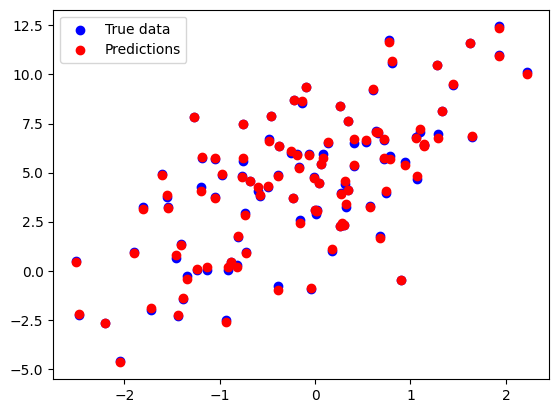

In [18]:
# check the weights and bias after training
print(f"Predicted weight: {model.linear.weight.data.numpy().flatten()}")
print(f"Predicted bias: {model.linear.bias.data.numpy().flatten()}")

# make predictions at new data points
with torch.no_grad():
    predictions = model(X)

# visualize the results
plt.scatter(X[:, 0], Y, label='True data', color='blue')
plt.scatter(X[:, 0], predictions, label='Predictions', color='red')
plt.legend()
plt.show()

- `model.linear.weight.data`：获取模型的权重;
- `model.linear.bias.data`：获取模型的偏置;
- `torch.no_grad()`：在评估模型时不需要计算梯度，节省内存

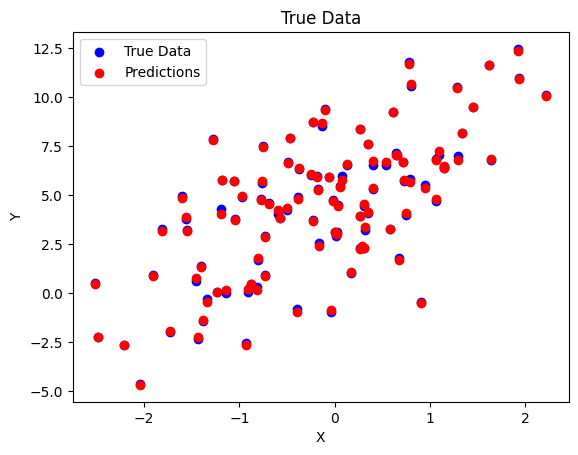

In [17]:
plt.scatter(X[:, 0], Y, label='True Data', color='blue')
plt.scatter(X[:, 0], predictions.detach().numpy(), label='Predictions', color='red')
# plt.scatter(X[:, 0], predictions.detach().numpy()-Y.numpy(), label='Residuals', color='green')
plt.title('Linear Regression Predictions')
plt.title('True Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

## 6. 结果分析
在训练过程中，随着损失逐渐减小，我们希望最终的模型能够你和我们生成的数据。通过查看训练后的权重和偏置，可以比较其与真实值 `true_w` 和 `true_b` 的接近程度。

理论上，模型的输出权重应该接近 `true_w`，偏置应该接近 `true_b`。如果模型训练得当，损失函数的值应该会逐渐减小，最终收敛到一个较小的值。

在可视化的散点图中，我们希望能够看到红色点尽可能地接近蓝色点，表示模型的预测值与真实值之间的差距较小。